## Analysis of weather data

Here we're creating a python script to 
- sample 500+ unique cities using Lattitude and Longitude
- retrieve weather information for these cities into a dataframe from OpenWeatherMap API successively
- Analyse how lattitude impacts each of the below parameters
    - Temperature
    - Humidity %
    - Cloudiness %
    - Wind Speed

We support the fact "It get's hotter near the equator" through data analysis.

### Process
Step 1 : Creating the sample 500+ cities from random Lattitude and Longitude values
- numpy.random() is used to get about 2000 random lattitude and longitudes
- A custom package called "citypy" is used to find the nearest town and its country from the lattitudes and longitudes

Step 2: Weather Information retrieval
- The sample cities that have been created is passed using the 'q' to the OpenWeatherMap API using url "http://api.openweathermap.org/data/2.5/weather"
- Each city's weather information (Temperature, Humidity, Cloudiness, WindSpeed) is collected and stored in a dataframe

Step 3: Analysis using MatPlotlib
- The data collected is used to create scatter plot for below and relationship analysed
    - Temperature (F) vs. Latitude
    - Humidity (%) vs. Latitude
    - Cloudiness (%) vs. Latitude
    - Wind Speed (mph) vs. Latitude

### Obeservations
- Temperature (F) vs. Latitude plot clearly shows that temperature does get hotter as we near the equator. 
    - The time of the year impacts the temperature. Since the data is collected end of December, northern hemisphere is much colder than southern hemisphere

- Humidity %, cloudiness % and wind speed are not impacted by lattitude as there are no significant trends to conclude on any relationship

- Almost three-fourth of cities have Humidity% between 60% to 100%.
- Similarly wind speeds for cities are clustered around 0 mph to 10 mph

In [2]:
%matplotlib inline

In [3]:
#import dependencies
import json, os, requests

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl

from datetime import date, time, datetime

from config import weather_api_key

import warnings
warnings.filterwarnings('ignore')

# import citipy - a library which maps the cities nearest to the latitude and longitude. If not present, install
try:
    from citipy import citipy
except:
    import pip
    !pip install citipy

In [4]:
# set range for Lattitde and Longitude
lat_rng = [-90,90]
lon_rng = [-180,180]

# set the weather url 
weather_url = "http://api.openweathermap.org/data/2.5/weather"
#create default params variable
p = {'q':'', 'appid':weather_api_key, 'units':'Imperial'}

#size of sample 
smp_size = 2000

#Output folders
result_dir = "data"
image_dir = "Images"

# Plot Style to use
mpl.style.use('seaborn')

# generate random lattitudes and longitudes
lat_rand = np.random.uniform(lat_rng[0],lat_rng[1], size = smp_size)
lon_rand = np.random.uniform(lon_rng[0],lon_rng[1], size = smp_size)

### Create a list of sample of 500+ unique cities
Use the random lattitude and longitude and pass it to the nearest_city() of citipy to get the nearest city name and country code

Note: Only extract unique cities

In [5]:
#iterate through the dataframe to get the nearest city and its country
cities_sel = []

for row in zip(lat_rand,lon_rand):
    tmp_obj = citipy.nearest_city(row[0], row[1])
    city = f"{tmp_obj.city_name},{(tmp_obj.country_code).upper()}"
    
    #add only if city, country is unique else skip it
    if(city not in cities_sel):
        cities_sel.append(city)
    
len(cities_sel)

772

### Retrieve weather information by successively calling OpenWeather Map API

In [6]:
num_cities = len(cities_sel)
# declare a new Dataframe to capture the details
city_weather_DF = pd.DataFrame(columns = ['City','Country','Lat','Lng','Date','Cloudiness','Max Temp','Humidity','Wind Speed'])

print("Begin retrieval of weather information \n ______________________________________")

# Connect to the weather api to extract information for each of the cities in the list
for i, row in enumerate(cities_sel):
    # set the q value in params to city value
    p['q'] = row
    
    # request data from OpenWeatherMap API
    r = requests.get(weather_url, params = p)
    print(f"Processing {i+1} of {num_cities}.... | City : {row} ")
    print(f"{r.url}")
    
    #retrieve the json data and extract the required information 
    json_data = r.json()
    #check if API returned information (success code = 200)
    if(json_data['cod'] == 200):
        city_weather_DF.loc[i] = [json_data['name'], json_data['sys']['country'],
                                  json_data['coord']['lat'], json_data['coord']['lon'],json_data['dt'],
                                  json_data['clouds']['all'],json_data['main']['temp_max'],
                                  json_data['main']['humidity'],json_data['wind']['speed']                                  
                                 ]
    else:
        print(f"Skipping... City data not available currently.  ")
        

#save the output to a csv file
city_weather_DF.to_csv(os.path.join(result_dir,"CityWeather_Details.csv"), index = False)
city_weather_DF.count()


Begin retrieval of weather information 
 ______________________________________
Processing 1 of 772.... | City : krumovgrad,BG 
http://api.openweathermap.org/data/2.5/weather?q=krumovgrad%2CBG&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 2 of 772.... | City : barentsburg,SJ 
http://api.openweathermap.org/data/2.5/weather?q=barentsburg%2CSJ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 3 of 772.... | City : aykhal,RU 
http://api.openweathermap.org/data/2.5/weather?q=aykhal%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 4 of 772.... | City : new norfolk,AU 
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 5 of 772.... | City : cape town,ZA 
http://api.openweathermap.org/data/2.5/weather?q=cape+town%2CZA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 6 of 772.... | City : ancud,CL 

Processing 49 of 772.... | City : lompoc,US 
http://api.openweathermap.org/data/2.5/weather?q=lompoc%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 50 of 772.... | City : bara,SD 
http://api.openweathermap.org/data/2.5/weather?q=bara%2CSD&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 51 of 772.... | City : rosarito,MX 
http://api.openweathermap.org/data/2.5/weather?q=rosarito%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 52 of 772.... | City : batken,KG 
http://api.openweathermap.org/data/2.5/weather?q=batken%2CKG&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 53 of 772.... | City : letlhakeng,BW 
http://api.openweathermap.org/data/2.5/weather?q=letlhakeng%2CBW&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 54 of 772.... | City : chuy,UY 
http://api.openweathermap.org/data/2.5/weather?q=chuy%2CUY&appid=216a25d1e5fc1da2b798d855ba143d3b&un

Processing 98 of 772.... | City : fairbanks,US 
http://api.openweathermap.org/data/2.5/weather?q=fairbanks%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 99 of 772.... | City : kazalinsk,KZ 
http://api.openweathermap.org/data/2.5/weather?q=kazalinsk%2CKZ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 100 of 772.... | City : ust-kamchatsk,RU 
http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 101 of 772.... | City : kavaratti,IN 
http://api.openweathermap.org/data/2.5/weather?q=kavaratti%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 102 of 772.... | City : castro,CL 
http://api.openweathermap.org/data/2.5/weather?q=castro%2CCL&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 103 of 772.... | City : cherskiy,RU 
http://api.openweat

Processing 146 of 772.... | City : teya,RU 
http://api.openweathermap.org/data/2.5/weather?q=teya%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 147 of 772.... | City : lebu,CL 
http://api.openweathermap.org/data/2.5/weather?q=lebu%2CCL&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 148 of 772.... | City : port macquarie,AU 
http://api.openweathermap.org/data/2.5/weather?q=port+macquarie%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 149 of 772.... | City : thompson,CA 
http://api.openweathermap.org/data/2.5/weather?q=thompson%2CCA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 150 of 772.... | City : methana,GR 
http://api.openweathermap.org/data/2.5/weather?q=methana%2CGR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 151 of 772.... | City : mossendjo,CG 
http://api.openweathermap.org/data/2.5/weather?q=mossendjo%2CCG&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 152

Processing 195 of 772.... | City : mendahara,ID 
http://api.openweathermap.org/data/2.5/weather?q=mendahara%2CID&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 196 of 772.... | City : muisne,EC 
http://api.openweathermap.org/data/2.5/weather?q=muisne%2CEC&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 197 of 772.... | City : saint-pierre,PM 
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre%2CPM&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 198 of 772.... | City : westport,IE 
http://api.openweathermap.org/data/2.5/weather?q=westport%2CIE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 199 of 772.... | City : mount gambier,AU 
http://api.openweathermap.org/data/2.5/weather?q=mount+gambier%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 200 of 772.... | City : plouzane,FR 
http://api.openweathermap.org/data/2.5/weather?q=plouzane%2CFR

Processing 243 of 772.... | City : east london,ZA 
http://api.openweathermap.org/data/2.5/weather?q=east+london%2CZA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 244 of 772.... | City : nizhneyansk,RU 
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 245 of 772.... | City : irbeyskoye,RU 
http://api.openweathermap.org/data/2.5/weather?q=irbeyskoye%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 246 of 772.... | City : tkibuli,GE 
http://api.openweathermap.org/data/2.5/weather?q=tkibuli%2CGE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 247 of 772.... | City : tambura,SD 
http://api.openweathermap.org/data/2.5/weather?q=tambura%2CSD&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 248 of 772.... | City : tuktoyaktuk,CA 
http://api.ope

Processing 291 of 772.... | City : kurkino,RU 
http://api.openweathermap.org/data/2.5/weather?q=kurkino%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 292 of 772.... | City : manaure,CO 
http://api.openweathermap.org/data/2.5/weather?q=manaure%2CCO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 293 of 772.... | City : abha,SA 
http://api.openweathermap.org/data/2.5/weather?q=abha%2CSA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 294 of 772.... | City : lubango,AO 
http://api.openweathermap.org/data/2.5/weather?q=lubango%2CAO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 295 of 772.... | City : ruteng,ID 
http://api.openweathermap.org/data/2.5/weather?q=ruteng%2CID&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 296 of 772.... | City : manzil salim,TN 
http://api.openweathermap.org/data/2.5/weather?q=manzil+salim%2CTN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 297 of 77

Processing 338 of 772.... | City : griffith,AU 
http://api.openweathermap.org/data/2.5/weather?q=griffith%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 339 of 772.... | City : zhigansk,RU 
http://api.openweathermap.org/data/2.5/weather?q=zhigansk%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 340 of 772.... | City : armasesti,RO 
http://api.openweathermap.org/data/2.5/weather?q=armasesti%2CRO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 341 of 772.... | City : lata,SB 
http://api.openweathermap.org/data/2.5/weather?q=lata%2CSB&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 342 of 772.... | City : netrakona,BD 
http://api.openweathermap.org/data/2.5/weather?q=netrakona%2CBD&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 343 of 772.... | City : tulle,FR 
http://api.openweathermap.org/data/2.5/weather?q=tulle%2CFR&appid=216a25d1e5fc1da2b79

Processing 388 of 772.... | City : pangnirtung,CA 
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung%2CCA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 389 of 772.... | City : belaya gora,RU 
http://api.openweathermap.org/data/2.5/weather?q=belaya+gora%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 390 of 772.... | City : hasaki,JP 
http://api.openweathermap.org/data/2.5/weather?q=hasaki%2CJP&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 391 of 772.... | City : santa rosa,AR 
http://api.openweathermap.org/data/2.5/weather?q=santa+rosa%2CAR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 392 of 772.... | City : guasdualito,VE 
http://api.openweathermap.org/data/2.5/weather?q=guasdualito%2CVE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 393 of 772.... | City : san policarpo,PH 
http://api.openweathermap.org/data/2.5/weather?q=san+policarpo%2CPH&appid=216a25d1e5fc1da2b798d855ba143d

Processing 436 of 772.... | City : vardo,NO 
http://api.openweathermap.org/data/2.5/weather?q=vardo%2CNO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 437 of 772.... | City : dingle,IE 
http://api.openweathermap.org/data/2.5/weather?q=dingle%2CIE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 438 of 772.... | City : yarmouth,CA 
http://api.openweathermap.org/data/2.5/weather?q=yarmouth%2CCA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 439 of 772.... | City : namibe,AO 
http://api.openweathermap.org/data/2.5/weather?q=namibe%2CAO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 440 of 772.... | City : lazaro cardenas,MX 
http://api.openweathermap.org/data/2.5/weather?q=lazaro+cardenas%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 441 of 772.... | City : sal rei,CV 
http://api.openweathermap.org/data/2.5/weather?q=sal+rei%2CCV&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 4

Processing 485 of 772.... | City : vestnes,NO 
http://api.openweathermap.org/data/2.5/weather?q=vestnes%2CNO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 486 of 772.... | City : qarqin,AF 
http://api.openweathermap.org/data/2.5/weather?q=qarqin%2CAF&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 487 of 772.... | City : byron bay,AU 
http://api.openweathermap.org/data/2.5/weather?q=byron+bay%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 488 of 772.... | City : santa cruz de tenerife,ES 
http://api.openweathermap.org/data/2.5/weather?q=santa+cruz+de+tenerife%2CES&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 489 of 772.... | City : shimoda,JP 
http://api.openweathermap.org/data/2.5/weather?q=shimoda%2CJP&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 490 of 772.... | City : susuman,RU 
http://api.openweathermap.org/data/2.5/weather?q=susuman%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units

Processing 535 of 772.... | City : kutum,SD 
http://api.openweathermap.org/data/2.5/weather?q=kutum%2CSD&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 536 of 772.... | City : rawah,IQ 
http://api.openweathermap.org/data/2.5/weather?q=rawah%2CIQ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 537 of 772.... | City : karpogory,RU 
http://api.openweathermap.org/data/2.5/weather?q=karpogory%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 538 of 772.... | City : bilibino,RU 
http://api.openweathermap.org/data/2.5/weather?q=bilibino%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 539 of 772.... | City : omboue,GA 
http://api.openweathermap.org/data/2.5/weather?q=omboue%2CGA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 540 of 772.... | City : vanimo,PG 
http://api.openweathermap.org/data/2.5/weather?q=vanimo%2CPG&appid=216a25d1e5fc1da2b798d855ba1

Processing 583 of 772.... | City : berbera,SO 
http://api.openweathermap.org/data/2.5/weather?q=berbera%2CSO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 584 of 772.... | City : te anau,NZ 
http://api.openweathermap.org/data/2.5/weather?q=te+anau%2CNZ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 585 of 772.... | City : cockburn harbour,TC 
http://api.openweathermap.org/data/2.5/weather?q=cockburn+harbour%2CTC&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 586 of 772.... | City : kailua,US 
http://api.openweathermap.org/data/2.5/weather?q=kailua%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 587 of 772.... | City : sukumo,JP 
http://api.openweathermap.org/data/2.5/weather?q=sukumo%2CJP&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 588 of 772.... | City : qaqortoq,GL 
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq%2CGL&appid=216a2

Processing 632 of 772.... | City : vila velha,BR 
http://api.openweathermap.org/data/2.5/weather?q=vila+velha%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 633 of 772.... | City : andenes,NO 
http://api.openweathermap.org/data/2.5/weather?q=andenes%2CNO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 634 of 772.... | City : pilao arcado,BR 
http://api.openweathermap.org/data/2.5/weather?q=pilao+arcado%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 635 of 772.... | City : alenquer,BR 
http://api.openweathermap.org/data/2.5/weather?q=alenquer%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 636 of 772.... | City : muroto,JP 
http://api.openweathermap.org/data/2.5/weather?q=muroto%2CJP&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 637 of 772.... | City : vigrestad,NO 
http://api.openweathermap.org/data/2.5/weather?q=vigrestad%2CNO&appid=2

Processing 680 of 772.... | City : khandyga,RU 
http://api.openweathermap.org/data/2.5/weather?q=khandyga%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 681 of 772.... | City : matamoros,MX 
http://api.openweathermap.org/data/2.5/weather?q=matamoros%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 682 of 772.... | City : boguchany,RU 
http://api.openweathermap.org/data/2.5/weather?q=boguchany%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 683 of 772.... | City : rancho veloz,CU 
http://api.openweathermap.org/data/2.5/weather?q=rancho+veloz%2CCU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 684 of 772.... | City : north bend,US 
http://api.openweathermap.org/data/2.5/weather?q=north+bend%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 685 of 772.... | City : natal,BR 
http://api.openweathermap.org/data/2.5/weather?q=natal%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial


Processing 728 of 772.... | City : garachine,PA 
http://api.openweathermap.org/data/2.5/weather?q=garachine%2CPA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 729 of 772.... | City : uyuni,BO 
http://api.openweathermap.org/data/2.5/weather?q=uyuni%2CBO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 730 of 772.... | City : anloga,GH 
http://api.openweathermap.org/data/2.5/weather?q=anloga%2CGH&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 731 of 772.... | City : mani,CO 
http://api.openweathermap.org/data/2.5/weather?q=mani%2CCO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 732 of 772.... | City : san juan,US 
http://api.openweathermap.org/data/2.5/weather?q=san+juan%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 733 of 772.... | City : duz,TN 
http://api.openweathermap.org/data/2.5/weather?q=duz%2CTN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available 

City          684
Country       684
Lat           684
Lng           684
Date          684
Cloudiness    684
Max Temp      684
Humidity      684
Wind Speed    684
dtype: int64

#### Clean dataset by removing duplicates and rows with missing values

In [7]:
# Check if any NAN values exist
print('No Null values found') if(city_weather_DF.isnull().values.sum() == 0) else city_weather_DF.dropna(how = 'any')

# check if any city is duplicated, if so drop duplicates
if(city_weather_DF.duplicated(['City','Country']).sum() == 0):
    print("No duplicates exists") 
else:
    print(f"{city_weather_DF.duplicated(['City','Country']).sum()} cities duplicated records removed")
    city_weather_DF.drop_duplicates(['City','Country'], inplace = True)

No Null values found
No duplicates exists


In [8]:
print(f"Total number of unqiue cities analysed : {len(city_weather_DF.index)}")

# convert UTC unix date to readale date format

city_weather_DF['Date Converted'] = \
                city_weather_DF['Date'].apply(lambda d : datetime.utcfromtimestamp(int(d)).strftime('%m/%d/%Y'))

city_weather_DF.head()

Total number of unqiue cities analysed : 684


,City,Country,Lat,Lng,Date,Cloudiness,Max Temp,Humidity,Wind Speed,Date Converted
0,Krumovgrad,BG,41.47,25.65,1546402058,0,18.01,78,2.35,01/02/2019
2,Aykhal,RU,65.95,111.51,1546402059,8,-5.89,68,9.40,01/02/2019
3,New Norfolk,AU,-42.78,147.06,1546399800,0,71.60,33,13.87,01/02/2019
4,Cape Town,ZA,-33.93,18.42,1546398000,20,62.60,67,23.04,01/02/2019
5,Ancud,CL,-41.87,-73.83,1546398000,75,46.40,93,4.70,01/02/2019


### Determine if the dataset is a representative sample 
Answer the query "Is data spread across all lattitudes and longitudes ? "

If not, data will have be sampled again before analysis


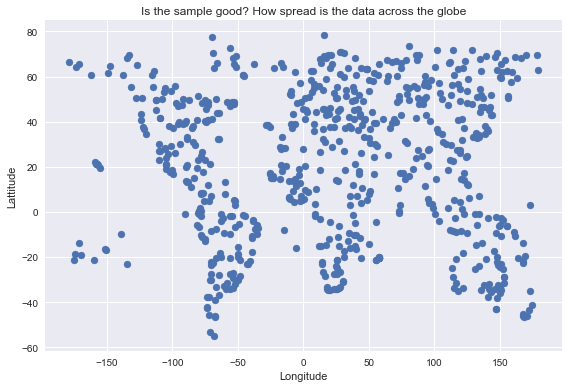

In [9]:
# check if the data is well spread to decide whether temperature increases near the equator
plt.scatter(city_weather_DF['Lng'],city_weather_DF['Lat'])
plt.title("Is the sample good? How spread is the data across the globe")
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()
plt.savefig(os.path.join(image_dir,'SampleSpread.png'))
plt.show()

### How does Temperature vary with Lattitude
Create a scatter plot of temperature against lattitude. Observe trends

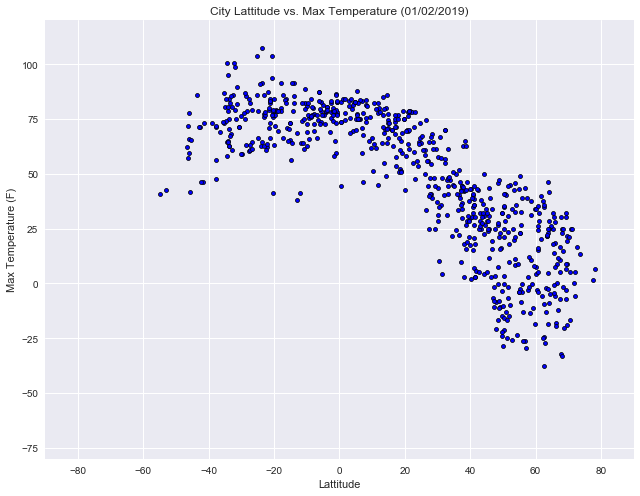

In [10]:
# Lattitude vs Temperature Plot

# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Temperature
ax_hndl = ax.scatter("Lat","Max Temp", data=city_weather_DF.loc[:,['Lat','Max Temp']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Max Temperature", \
                linewidths = 0.75)
# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Max Temperature (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-80, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Temp.png'))
plt.show()

### Relationship between Humidity % and Lattitude

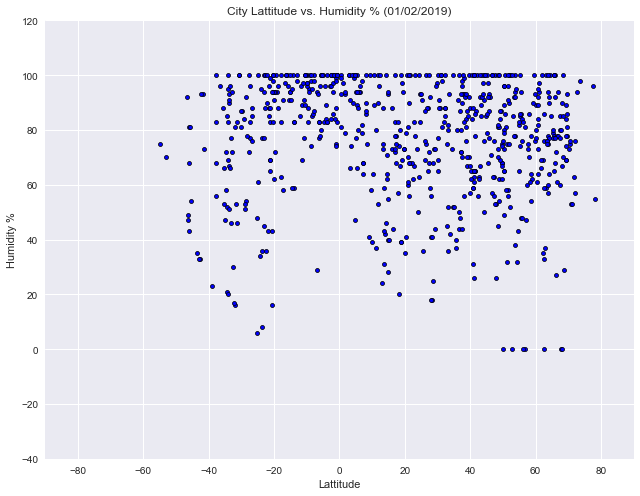

In [11]:
# Lattitude vs Humidity Plot

# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Humidity %
ax_hndl = ax.scatter("Lat","Humidity", data=city_weather_DF.loc[:,['Lat','Humidity']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Humidity", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Humidity % (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Humidity %")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-40, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Humidity.png'))

plt.show()

### Scatter Plot of Cloudiness % against Lattitude

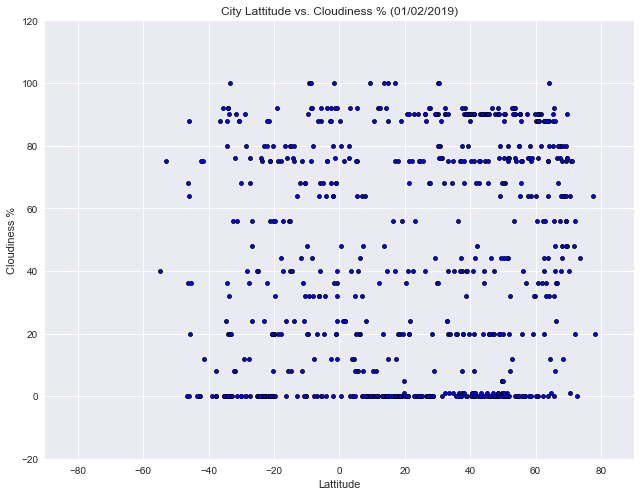

In [12]:
# Lattitude vs Cloudiness % Plot
# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Cloudiness %
ax_hndl = ax.scatter("Lat","Cloudiness", data=city_weather_DF.loc[:,['Lat','Cloudiness']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Cloudiness", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Cloudiness % (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Cloudiness %")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-20, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Cloudiness.png'))

plt.show()

### Is Wind Speed impacted by Lattitude?

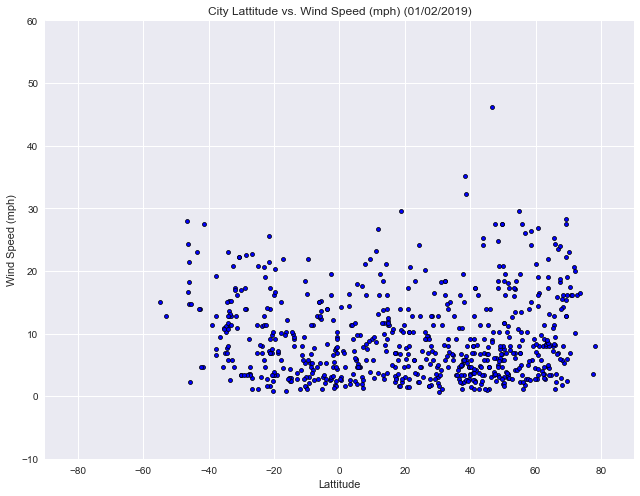

In [13]:
# Lattitude vs Wind Speed Plot
# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Wind Speed (mph)
ax_hndl = ax.scatter("Lat","Wind Speed", data=city_weather_DF.loc[:,['Lat','Wind Speed']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Wind Speed", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Wind Speed (mph) (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-10, 60, 10)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_WindSpd.png'))

plt.show()